# **Práctica 6: ACP y ACD**

Nombres: 
* Mora González Alan Francisco
* Herrera Godina Diana Celeste

Número de cuenta:
* 113005901
* 316161927

Email: 
* alanfmorag@gmail.com
* dayanceles@gmail.com

### **Contexto**

Este conjunto de datos proporciona una visión exhaustiva de la salud financiera de los desarrolladores de software en las principales ciudades y áreas metropolitanas de los Estados Unidos. Exploramos las disparidades entre estados y ciudades en términos de salarios medios de desarrolladores de software, precios medios de viviendas, promedio de costo de vida, promedio de alquiler, costo de vida más promedio de alquiler y promedios de poder adquisitivo local.

**Objetivo:** Realizar una selección de características a través de Análisis de Componentes Principales (ACP) y Análisis Correlacional de Datos (ACD).


**Fuente de datos:**
* 1) Metro: El área metropolitana de la ciudad. (Cadena)
* 2) Salario medio del desarrollador de software (ajustado): El salario promedio para los desarrolladores de software ajustado por las diferencias de costo de vida entre ciudades. (Número)
* 3) Salario medio del desarrollador de software (no ajustado): El salario promedio para los desarrolladores de software sin ajustar las diferencias de costo de vida entre ciudades. (Número)
* 4) Salario medio no ajustado (todas las ocupaciones):	El salario promedio para todas las ocupaciones sin ajustar las diferencias de costo de vida entre ciudades. (Número)
* 5) Número de trabajos de desarrollador de software: El número de trabajos de desarrollador de software en la ciudad. (Número)
* 6) Precio medio de la vivienda: El precio medio de la vivienda en la ciudad. (Número)
* 7) Ciudad:	El nombre de la ciudad. (Cadena)
* 8) Costo de vida promedio:	El costo promedio de vida en la ciudad. (Número)
* 9) Alquiler promedio:	El alquiler promedio en la ciudad. (Número)
* 10) Costo de vida más alquiler promedio:	El costo de vida promedio más el alquiler en la ciudad. (Número)
* 11) Promedio de poder adquisitivo local:	El poder adquisitivo local promedio en la ciudad. (Número)

### **Importar las bibliotecas y los datos**

In [1]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline                
# Para generar y almacenar los gráficos dentro del cuaderno

In [2]:
url = "https://raw.githubusercontent.com/alanmgg/Data-Mining/main/Datos/sd_salary.csv"
data_software = pd.read_csv(url)
data_software = data_software.drop(columns=['ID'])
data_software

,Metro,Mean Software Developer Salary (adjusted),Mean Software Developer Salary (unadjusted),Mean Unadjusted Salary (all occupations),Number of Software Developer Jobs,Median Home Price,City,Cost of Living avg,Rent avg,Cost of Living Plus Rent avg,Local Purchasing Power avg
0,"Columbus, OH",117552,108500,51260,13430,192000,"Columbus, OH",984.8,1421.5,2856.5,9335.4
1,"Seattle-Tacoma-Bellevue, WA",117323,131167,65400,65760,491600,"Seattle, WA",1250.7,2528.2,4091.5,8971.3
2,"Charlotte-Concord-Gastonia, NC-SC",114122,107046,51000,12800,208500,"Charlotte, NC",989.9,1974.5,3221.1,8939.8
3,"Colorado Springs, CO",112118,111670,51430,5780,296500,"Colorado Springs, CO",1049.2,1594.0,3094.5,8493.1
4,"Dayton, OH",111616,99338,50100,4240,124100,"Dayton, OH",961.2,1072.1,2586.0,4887.7
...,...,...,...,...,...,...,...,...,...,...,...
72,"Cleveland-Elyria, OH",89040,80314,50470,8220,146500,"Cleveland, OH",1065.5,1355.1,2973.1,7732.9
73,"Miami-Fort Lauderdale-West Palm Beach, FL",88249,95662,48240,13740,283400,"Miami, FL",1102.1,2494.4,3775.8,5782.4
74,"Miami-Fort Lauderdale-West Palm Beach, FL",88249,95662,48240,13740,283400,"Fort Lauderdale, FL",1086.0,2171.9,3537.8,6252.0
75,"Eugene, OR",85912,84021,47320,1220,293900,"Eugene, OR",984.0,1448.0,2871.7,5443.0


In [3]:
data_software.head(10)

,Metro,Mean Software Developer Salary (adjusted),Mean Software Developer Salary (unadjusted),Mean Unadjusted Salary (all occupations),Number of Software Developer Jobs,Median Home Price,City,Cost of Living avg,Rent avg,Cost of Living Plus Rent avg,Local Purchasing Power avg
0,"Columbus, OH",117552,108500,51260,13430,192000,"Columbus, OH",984.8,1421.5,2856.5,9335.4
1,"Seattle-Tacoma-Bellevue, WA",117323,131167,65400,65760,491600,"Seattle, WA",1250.7,2528.2,4091.5,8971.3
2,"Charlotte-Concord-Gastonia, NC-SC",114122,107046,51000,12800,208500,"Charlotte, NC",989.9,1974.5,3221.1,8939.8
3,"Colorado Springs, CO",112118,111670,51430,5780,296500,"Colorado Springs, CO",1049.2,1594.0,3094.5,8493.1
4,"Dayton, OH",111616,99338,50100,4240,124100,"Dayton, OH",961.2,1072.1,2586.0,4887.7
5,"Greensboro-High Point, NC",111050,99612,44570,1560,136000,"Greensboro, NC",992.9,1445.4,2888.0,5721.9
6,"San Francisco-Oakland-Hayward, CA",111017,142101,72400,59550,946700,"San Francisco, CA",1326.9,4163.3,5290.7,8216.7
7,"San Francisco-Oakland-Hayward, CA",111017,142101,72400,59550,946700,"Oakland, CA",1313.0,3371.1,4754.9,6894.3
8,"San Antonio-New Braunfels, TX",110898,104688,46650,5410,194100,"San Antonio, TX",884.3,1469.5,2688.9,8494.9
9,"Dallas-Fort Worth-Arlington, TX",110891,111113,52590,46130,243900,"Fort Worth, TX",995.0,1551.7,2960.0,6949.2


### **Paso 1: Descripción de la estructura de los datos**

1) Forma (dimensiones) del DataFrame

El atributo .shape de Pandas proporciona una estructura general de los datos. Devuelve la cantidad de filas y columnas que tiene el conjunto de datos.

In [4]:
data_software.shape

(77, 11)

2) Tipos de datos (variables)

El atributo .dtypes muestra los tipos de datos de las columnas (variables y tipos).

In [5]:
data_software.dtypes

Metro                                           object
Mean Software Developer Salary (adjusted)        int64
Mean Software Developer Salary (unadjusted)      int64
Mean Unadjusted Salary (all occupations)         int64
Number of Software Developer Jobs                int64
Median Home Price                                int64
City                                            object
Cost of Living avg                             float64
Rent avg                                       float64
Cost of Living Plus Rent avg                   float64
Local Purchasing Power avg                     float64
dtype: object

Se observa que el conjunto de datos tiene una combinación de variables categóricas (objeto) y numéricas (flotante e int).

### **Paso 2: Identificación de datos faltantes**

Una función útil de pandas es **.isnull().sum()** que regresa la suma de todos los valores nulos en cada variable.

In [6]:
data_software.isnull().sum()

Metro                                          0
Mean Software Developer Salary (adjusted)      0
Mean Software Developer Salary (unadjusted)    0
Mean Unadjusted Salary (all occupations)       0
Number of Software Developer Jobs              0
Median Home Price                              0
City                                           0
Cost of Living avg                             0
Rent avg                                       0
Cost of Living Plus Rent avg                   0
Local Purchasing Power avg                     0
dtype: int64

También se puede usar info() para obtener el tipo de datos y la suma de valores nulos.

In [7]:
data_software.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Metro                                        77 non-null     object 
 1   Mean Software Developer Salary (adjusted)    77 non-null     int64  
 2   Mean Software Developer Salary (unadjusted)  77 non-null     int64  
 3   Mean Unadjusted Salary (all occupations)     77 non-null     int64  
 4   Number of Software Developer Jobs            77 non-null     int64  
 5   Median Home Price                            77 non-null     int64  
 6   City                                         77 non-null     object 
 7   Cost of Living avg                           77 non-null     float64
 8   Rent avg                                     77 non-null     float64
 9   Cost of Living Plus Rent avg                 77 non-null     float64
 10  Loca

### **Paso 3: Detección de valores atípicos**

Se pueden utilizar gráficos para tener una idea general de las distribuciones de los datos, y se sacan estadísticas para resumir los datos. Estas dos estrategias son recomendables y se complementan.

La distribución se refiere a cómo se distribuyen los valores en una variable o con qué frecuencia ocurren.

Para las variables numéricas, se observa cuántas veces aparecen grupos de números en una columna. Mientras que para las variables categóricas, son las clases de cada columna y su frecuencia.

**1) Distribución de variables numéricas**

* Se utilizan histogramas que agrupan los números en rangos.
* La altura de una barra muestra cuántos números caen en ese rango. 
* Se emplea **hist()** para trazar el histograma de las variables numéricas. También se pueden usar los parámetros: **figsize** y **xrot** para aumentar el tamaño de la cuadrícula y rotar el eje x 45 grados.

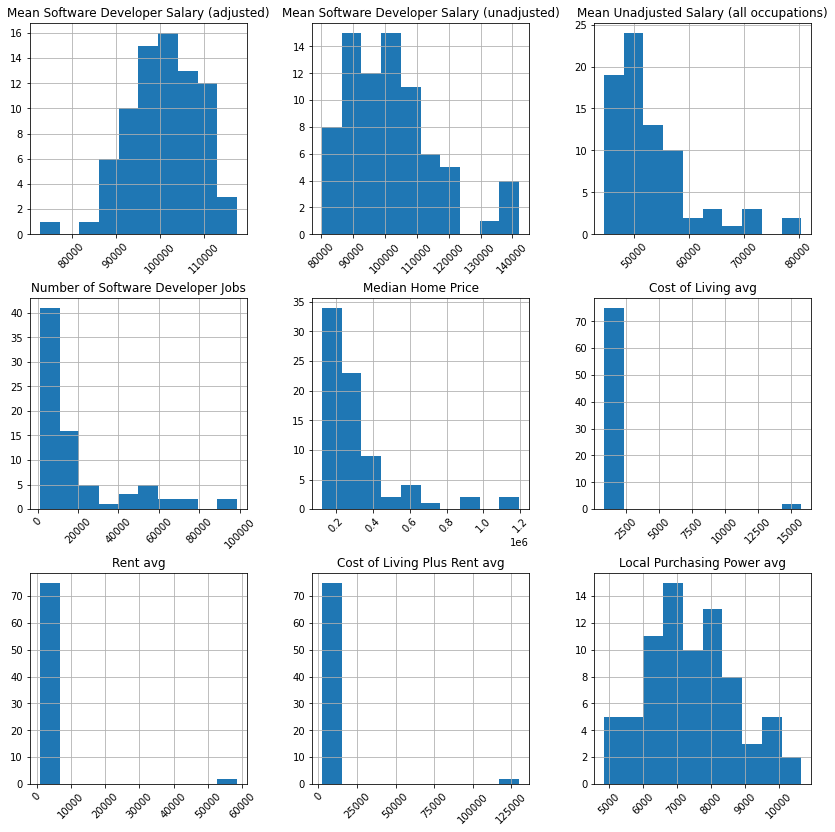

In [8]:
data_software.hist(figsize=(14,14), xrot=45)
plt.show()

**Qué buscar:**

* Posibles valores atípicos, que pueden ser errores de medición.
* Límites que no tienen sentido, como valores porcentuales > 100.

En el histograma, se observa que **Cost of Living avg**, **Rent avg** y **Cost of Living Plus Rent avg** tienen valores sesgados a la izquierda.

**2) Resumen estadístico de variables numéricas**

Se sacan estadísticas usando **describe()** que muestra un resumen estadístico de las variables numéricas.

In [9]:
data_software.describe()

,Mean Software Developer Salary (adjusted),Mean Software Developer Salary (unadjusted),Mean Unadjusted Salary (all occupations),Number of Software Developer Jobs,Median Home Price,Cost of Living avg,Rent avg,Cost of Living Plus Rent avg,Local Purchasing Power avg
count,77.000000,77.000000,77.000000,77.000000,7.700000e+01,77.000000,77.000000,77.000000,77.000000
mean,100832.974026,101866.207792,53277.272727,19098.571429,3.127013e+05,1414.057143,3280.429870,6506.988312,7421.228571
std,8064.298677,13926.636588,7813.343788,23858.147274,2.227433e+05,2369.540953,9118.805313,20325.065018,1327.443694
min,72811.000000,80314.000000,44500.000000,1120.000000,1.241000e+05,832.500000,879.300000,2241.400000,4840.100000
25%,95308.000000,91976.000000,48240.000000,3170.000000,1.784000e+05,957.300000,1340.500000,2810.800000,6464.200000
50%,101256.000000,100614.000000,51050.000000,8770.000000,2.437000e+05,995.000000,1625.800000,2999.900000,7499.000000
75%,107170.000000,109503.000000,56160.000000,21160.000000,3.660000e+05,1086.000000,2171.900000,3446.900000,8153.100000
max,117552.000000,142101.000000,80480.000000,98650.000000,1.193600e+06,15809.200000,58597.600000,130097.800000,10673.700000


* Se incluye un recuento, media, desviación, valor mínimo, valor máximo, percentil inferior (25%), 50% y percentil superior (75%).
* Por defecto, el percentil 50 es lo mismo que la mediana.

**3) Diagramas para detectar posibles valores atípicos**

Para este tipo de gráficos se utiliza **Seaborn**, que permite generar diagramas de cajas para detectar valores atípicos.

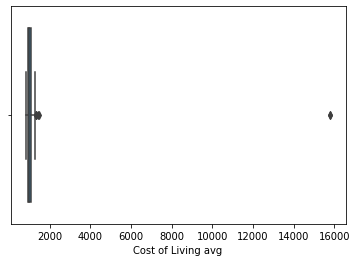

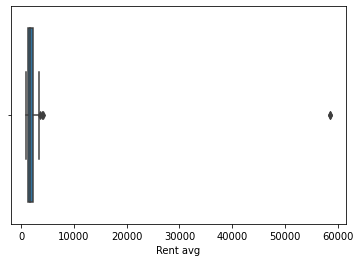

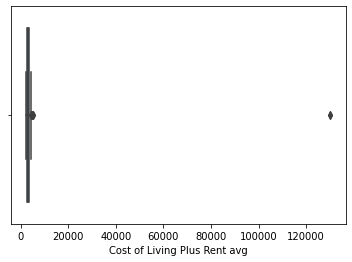

In [10]:
variables_atipicas = ['Cost of Living avg', 'Rent avg', 'Cost of Living Plus Rent avg']
for col in variables_atipicas:
  sns.boxplot(x=col, data=data_software)
  plt.show()

**4) Distribución de variables categóricas**

Se refiere a la observación de las clases de cada columna (variable) y su frecuencia. Aquí, los gráficos ayudan para tener una idea general de las distribuciones, mientras que las estadísticas dan números reales.

In [11]:
data_software.describe(include='object')

,Metro,City
count,77,77
unique,69,77
top,"New York-Newark-Jersey City, NY-NJ-PA","Columbus, OH"
freq,2,1


* Esta tabla es diferente al de los valores numéricos. Aquí, se obtiene el recuento de los valores de cada variable, el número de clases únicas, la clase más frecuente y con qué frecuencia ocurre esa clase en el conjunto de datos.
* Se observa que algunas clases tienen demasiados valores únicos, como City, seguida de Metro. 
* A partir de estos hallazgos, se puede a manera de ejemplo graficar las variables con 10 o menos clases únicas.

**Plot**

* Para este tipo de gráficos se utiliza Seaborn, que permite generar un histograma para variables categóricas. Cada barra en el gráfico de conteo representa una clase.
* Se crea un bucle para el conteo y distribución de las clases. La sentencia select_dtypes(include = ’object’) selecciona las columnas categóricas con sus valores y las muestra.
* Se incluye también If para elegir solo una columna con 10 o menos clases usando series.**nunique() < 70**.

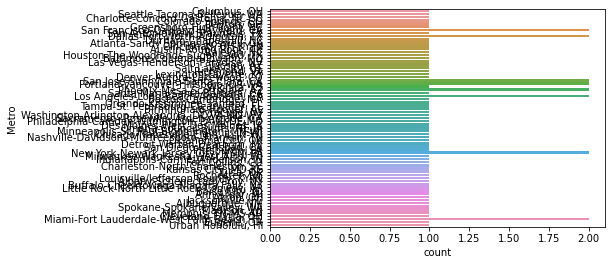

In [12]:
for col in data_software.select_dtypes(include='object'):
  if data_software[col].nunique()<70:sns.countplot(y=col, data=data_software)
  plt.show()

**5) Agrupación por variables categóricas**

In [13]:
for col in data_software.select_dtypes(include='object'):
  if data_software[col].nunique() < 70:
    display(data_software.groupby(col).agg(['mean']))

<ipython-input-13-f70073cf31c0>:3: FutureWarning: ['City'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  display(data_software.groupby(col).agg(['mean']))


,Mean Software Developer Salary (adjusted),Mean Software Developer Salary (unadjusted),Mean Unadjusted Salary (all occupations),Number of Software Developer Jobs,Median Home Price,Cost of Living avg,Rent avg,Cost of Living Plus Rent avg,Local Purchasing Power avg
,mean,mean,mean,mean,mean,mean,mean,mean,mean
Metro,,,,,,,,,
"Akron, OH",92207.0,83355.0,48910.0,2590.0,141900.0,878.8,879.3,2299.7,6348.8
"Albany-Schenectady-Troy, NY",94051.0,94615.0,54400.0,2980.0,217600.0,1010.1,1332.5,2849.2,8006.2
"Albuquerque, NM",91010.0,87097.0,46860.0,1770.0,199500.0,896.4,1302.1,2605.4,7555.2
"Ann Arbor, MI",92683.0,94258.0,55130.0,2650.0,290500.0,993.0,1842.0,3142.3,9872.2
"Atlanta-Sandy Springs-Roswell, GA",109849.0,106334.0,52750.0,38110.0,219600.0,1082.3,1865.4,3334.0,8063.0
...,...,...,...,...,...,...,...,...,...
"Tucson, AZ",107170.0,101919.0,47610.0,4480.0,206200.0,909.1,1062.1,130097.8,5164.1
"Tulsa, OK",95187.0,86049.0,46170.0,1770.0,138200.0,881.0,1110.5,2452.0,8148.2


### **Paso 4: Identificación de relaciones entre pares variables**

Una matriz de correlaciones es útil para analizar la relación entre las variables numéricas.
Se emplea la función corr()

In [14]:
data_software.corr()

,Mean Software Developer Salary (adjusted),Mean Software Developer Salary (unadjusted),Mean Unadjusted Salary (all occupations),Number of Software Developer Jobs,Median Home Price,Cost of Living avg,Rent avg,Cost of Living Plus Rent avg,Local Purchasing Power avg
Mean Software Developer Salary (adjusted),1.000000,0.618748,0.256262,0.271436,0.123461,0.001220,0.050742,0.112387,0.317559
Mean Software Developer Salary (unadjusted),0.618748,1.000000,0.837704,0.784464,0.785842,0.152999,-0.019006,-0.010738,0.349720
Mean Unadjusted Salary (all occupations),0.256262,0.837704,1.000000,0.816883,0.835459,0.112083,0.003229,-0.123182,0.312406
Number of Software Developer Jobs,0.271436,0.784464,0.816883,1.000000,0.652009,0.170448,-0.021038,-0.089473,0.339211
Median Home Price,0.123461,0.785842,0.835459,0.652009,1.000000,0.126911,-0.019267,-0.063559,0.199677
Cost of Living avg,0.001220,0.152999,0.112083,0.170448,0.126911,1.000000,-0.017873,-0.029944,-0.002585
Rent avg,0.050742,-0.019006,0.003229,-0.021038,-0.019267,-0.017873,1.000000,-0.039798,-0.009309
Cost of Living Plus Rent avg,0.112387,-0.010738,-0.123182,-0.089473,-0.063559,-0.029944,-0.039798,1.000000,-0.206616
Local Purchasing Power avg,0.317559,0.349720,0.312406,0.339211,0.199677,-0.002585,-0.009309,-0.206616,1.000000


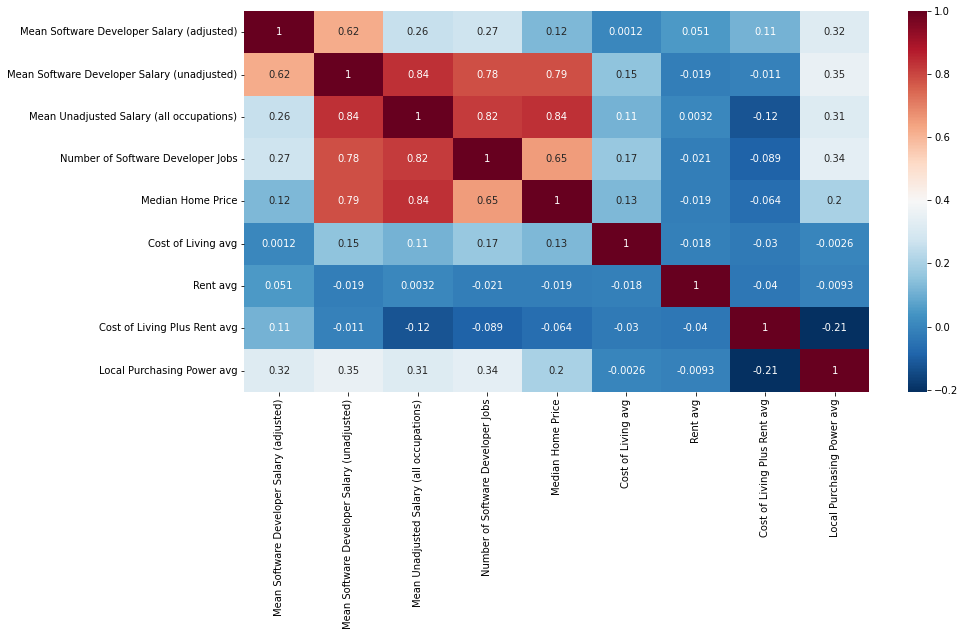

In [15]:
plt.figure(figsize=(14,7))
sns.heatmap(data_software.corr(), cmap='RdBu_r', annot=True)
plt.show()

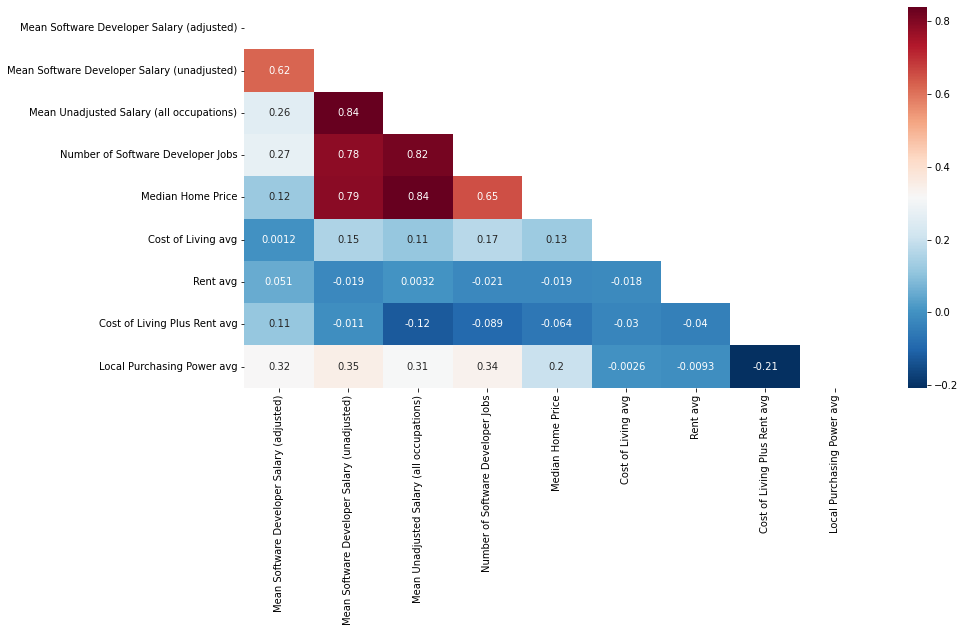

In [16]:
plt.figure(figsize=(14,7))
matriz_inf = np.triu(data_software.corr())
sns.heatmap(data_software.corr(), cmap='RdBu_r', annot=True, mask=matriz_inf)
plt.show()

* Una correlación es un valor entre -1 y 1 que equivale a qué tan cerca se mueven simultáneamente los valores de dos variables. 
* Una correlación positiva significa que a medida que una característica aumenta, la otra también aumenta.
* Una correlación negativa significa que a medida que una característica disminuye, la otra también disminuye. 
* Las correlaciones cercanas a 0 indican una relación débil, mientras que las más cercanas a -1 o 1 significan una relación fuerte.

### **Paso 5: Preparación de los datos**

No se eliminan los datos nulos debido a que nuestros datos no contienen nulos.
Proseguimos con la eliminación de datos atipicos que previamente visualizamos.

In [17]:
data_software = data_software[data_software['Cost of Living avg'] < 1200]
data_software = data_software[data_software['Rent avg'] < 3000]
data_software = data_software[data_software['Cost of Living Plus Rent avg'] < 4000]

In [18]:
data_software.shape

(61, 11)

In [19]:
data_software

,Metro,Mean Software Developer Salary (adjusted),Mean Software Developer Salary (unadjusted),Mean Unadjusted Salary (all occupations),Number of Software Developer Jobs,Median Home Price,City,Cost of Living avg,Rent avg,Cost of Living Plus Rent avg,Local Purchasing Power avg
0,"Columbus, OH",117552,108500,51260,13430,192000,"Columbus, OH",984.8,1421.5,2856.5,9335.4
2,"Charlotte-Concord-Gastonia, NC-SC",114122,107046,51000,12800,208500,"Charlotte, NC",989.9,1974.5,3221.1,8939.8
3,"Colorado Springs, CO",112118,111670,51430,5780,296500,"Colorado Springs, CO",1049.2,1594.0,3094.5,8493.1
4,"Dayton, OH",111616,99338,50100,4240,124100,"Dayton, OH",961.2,1072.1,2586.0,4887.7
5,"Greensboro-High Point, NC",111050,99612,44570,1560,136000,"Greensboro, NC",992.9,1445.4,2888.0,5721.9
...,...,...,...,...,...,...,...,...,...,...,...
71,"Memphis, TN-MS-AR",89921,81918,44610,1590,139900,"Memphis, TN",880.1,1340.5,2597.5,6784.5
72,"Cleveland-Elyria, OH",89040,80314,50470,8220,146500,"Cleveland, OH",1065.5,1355.1,2973.1,7732.9
73,"Miami-Fort Lauderdale-West Palm Beach, FL",88249,95662,48240,13740,283400,"Miami, FL",1102.1,2494.4,3775.8,5782.4
74,"Miami-Fort Lauderdale-West Palm Beach, FL",88249,95662,48240,13740,283400,"Fort Lauderdale, FL",1086.0,2171.9,3537.8,6252.0


**Histogramas de datos sin sesgo.**

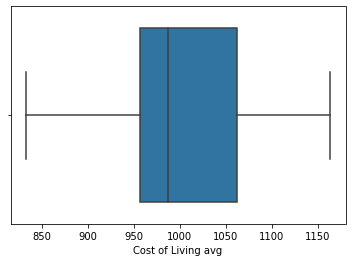

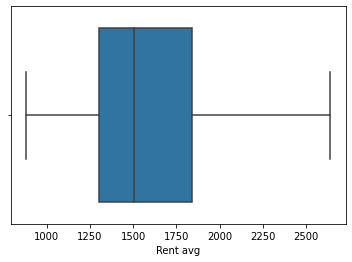

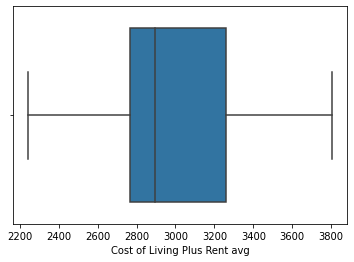

In [20]:
variables_atipicas = ['Cost of Living avg', 'Rent avg', 'Cost of Living Plus Rent avg']
for col in variables_atipicas:
  sns.boxplot(x=col, data=data_software)
  plt.show()

**Distribución de variables númericas**

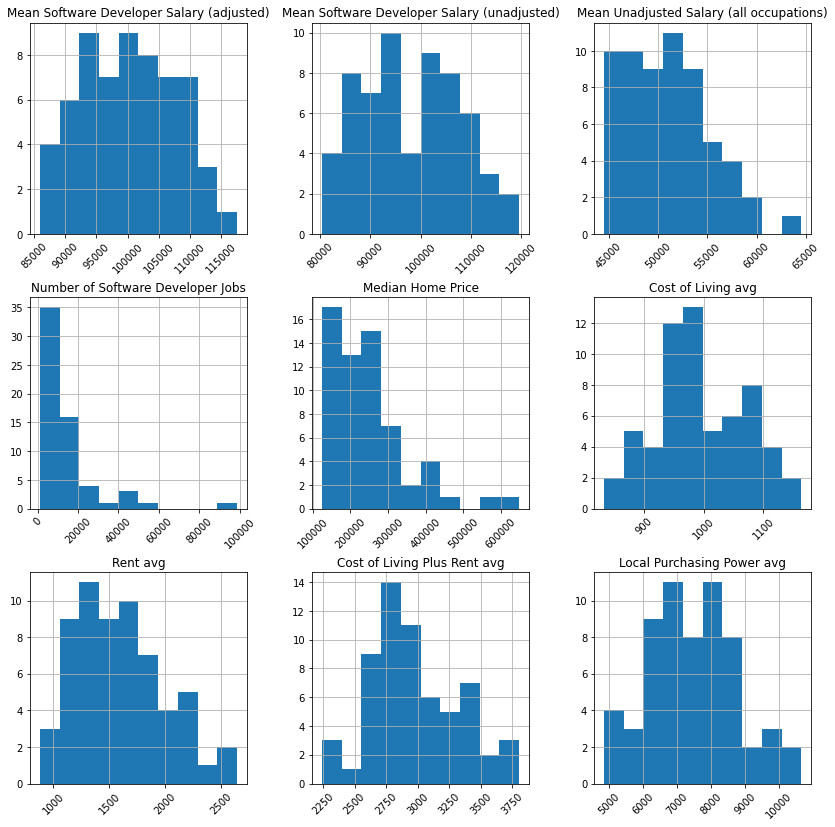

In [21]:
data_software.hist(figsize=(14,14), xrot=45)
plt.show()

### **Paso 6: Análisis de componentes principales (ACP)**

1. Hay evidencia de variables posiblemente correlacionadas.
2. Se hace una estandarización de los datos.
3. Con los datos estandarizados, se calcula la matriz de covarianzas o correlaciones.
4. Se calculan los componentes (eigen-vectores) y la varianza (eigen-valores) a partir de la matriz anterior.
5. Se decide el número de componentes principales. 
- Se calcula el porcentaje de relevancia, es decir, entre el 75 y 90% de varianza total. 
- Se identifica mediante una gráfica el grupo de componentes con mayor varianza.
6. Se examina la proporción de relevancias –cargas–

#### **1)** Hay evidencia de variables posiblemente correlacionadas.

In [22]:
corr_software = data_software.corr(method='pearson')
corr_software

,Mean Software Developer Salary (adjusted),Mean Software Developer Salary (unadjusted),Mean Unadjusted Salary (all occupations),Number of Software Developer Jobs,Median Home Price,Cost of Living avg,Rent avg,Cost of Living Plus Rent avg,Local Purchasing Power avg
Mean Software Developer Salary (adjusted),1.000000,0.730788,0.243339,0.221750,0.065477,-0.051104,0.104835,0.053596,0.282476
Mean Software Developer Salary (unadjusted),0.730788,1.000000,0.661838,0.630806,0.618118,0.258795,0.613610,0.547329,0.366685
Mean Unadjusted Salary (all occupations),0.243339,0.661838,1.000000,0.638128,0.602579,0.424969,0.529945,0.557079,0.298637
Number of Software Developer Jobs,0.221750,0.630806,0.638128,1.000000,0.466375,0.318303,0.560590,0.534317,0.346747
Median Home Price,0.065477,0.618118,0.602579,0.466375,1.000000,0.293541,0.733844,0.647890,0.129524
Cost of Living avg,-0.051104,0.258795,0.424969,0.318303,0.293541,1.000000,0.521841,0.792319,-0.187465
Rent avg,0.104835,0.613610,0.529945,0.560590,0.733844,0.521841,1.000000,0.933912,0.252354
Cost of Living Plus Rent avg,0.053596,0.547329,0.557079,0.534317,0.647890,0.792319,0.933912,1.000000,0.101910
Local Purchasing Power avg,0.282476,0.366685,0.298637,0.346747,0.129524,-0.187465,0.252354,0.101910,1.000000


#### **2)** Se hace una estandarización de los datos.

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler  
estandarizar = StandardScaler()  
data_software = data_software.drop(columns=['Metro', 'City'])                            # Se instancia el objeto StandardScaler o MinMaxScaler 
m_estandarizada = estandarizar.fit_transform(data_software)  # Se calculan la media y desviación para cada variable, y se escalan los datos

In [24]:
pd.DataFrame(m_estandarizada, columns=data_software.columns)

,Mean Software Developer Salary (adjusted),Mean Software Developer Salary (unadjusted),Mean Unadjusted Salary (all occupations),Number of Software Developer Jobs,Median Home Price,Cost of Living avg,Rent avg,Cost of Living Plus Rent avg,Local Purchasing Power avg
0,2.289989,1.065324,0.059706,0.011653,-0.519406,-0.144899,-0.408100,-0.352587,1.425918
1,1.834369,0.916279,0.000411,-0.026721,-0.362353,-0.077234,0.987143,0.673592,1.125121
2,1.568170,1.390271,0.098476,-0.454318,0.475263,0.709529,0.027125,0.317272,0.785470
3,1.501487,0.126154,-0.204841,-0.548121,-1.165703,-0.458012,-1.289651,-1.113919,-1.955921
4,1.426303,0.154241,-1.466003,-0.711363,-1.052435,-0.037432,-0.347799,-0.263929,-1.321631
...,...,...,...,...,...,...,...,...,...
56,-1.380345,-1.659518,-1.456881,-0.709536,-1.015313,-1.534006,-0.612467,-1.081551,-0.513676
57,-1.497371,-1.823940,-0.120460,-0.305695,-0.952492,0.925789,-0.575630,-0.024413,0.207447
58,-1.602443,-0.250662,-0.629030,0.030536,0.350572,1.411379,2.298873,2.234813,-1.275629
59,-1.602443,-0.250662,-0.629030,0.030536,0.350572,1.197773,1.485191,1.564954,-0.918566


#### **3) y 4):** Se calcula la matriz de covarianzas o correlaciones, y se calculan los componentes (eigen-vectores) y la varianza (eigen-valores).

In [25]:
pca = PCA(n_components=9)     #Se instancia el objeto PCA    #pca=PCA(n_components=None), pca=PCA(.85)
pca.fit(m_estandarizada)       #Se obtiene los componentes
print(pca.components_)

[[ 1.58649142e-01  3.90230035e-01  3.72359556e-01  3.52874327e-01
   3.61071189e-01  2.70202093e-01  4.08864829e-01  4.05662120e-01
   1.55773109e-01]
 [-5.53259976e-01 -3.31372154e-01 -6.78792788e-02 -1.14994462e-01
   9.44022708e-02  4.59217779e-01  1.70918517e-01  3.14692189e-01
  -4.67148265e-01]
 [ 6.07353162e-01  2.72551803e-01 -6.64048292e-02 -1.92025847e-01
  -1.83168193e-01  3.36015747e-01 -1.43426216e-01  3.82802494e-02
  -5.89118407e-01]
 [-1.34631584e-02  1.58581241e-01 -8.67857202e-02 -2.94689006e-01
   6.92769837e-01 -4.85095935e-01  1.39010633e-01 -1.03837094e-01
  -3.67346089e-01]
 [-1.81604394e-01 -8.56323078e-03  5.74013836e-01  4.62836142e-01
   7.16193657e-02 -4.69331190e-02 -4.17293068e-01 -3.18186903e-01
  -3.74871813e-01]
 [-4.95333967e-03 -4.58865877e-02  5.80111694e-01 -6.98798565e-01
   1.15846455e-01  2.21815965e-01 -1.89166055e-01 -4.23653549e-02
   2.69850941e-01]
 [ 2.55939751e-02 -1.07279878e-01  4.16003968e-01 -1.17936087e-01
  -5.02907036e-01 -4.6071440

#### **5)** Se decide el número de componentes principales

* Se calcula el porcentaje de relevancia, es decir, entre el 75 y 90% de varianza total.
* Se identifica mediante una gráfica el grupo de componentes con mayor varianza.

In [26]:
varianza = pca.explained_variance_ratio_
print('Porporción de varianza:', varianza)
print('Varianza acumulada:', sum(varianza[0:4]))   
#Con 6 componentes se tiene el 87% de varianza acumulada y con 5 el 93%

Porporción de varianza: [5.12048700e-01 1.91170070e-01 9.86482488e-02 7.13626094e-02
 6.43358020e-02 4.27933020e-02 1.52368343e-02 4.40441874e-03
 1.45211093e-08]
Varianza acumulada: 0.8732296283934903


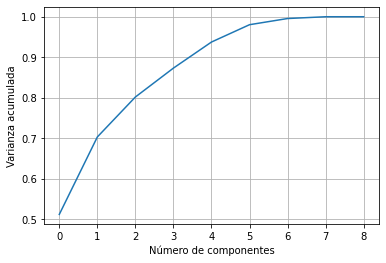

In [27]:
# Se grafica la varianza acumulada en los componentes
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.grid()
plt.show()

#### **6)** Se examina la proporción de relevancias –cargas–

La importancia de cada variable se refleja en la magnitud de los valores en los componentes (mayor magnitud es sinónimo de mayor importancia).

Se revisan los valores absolutos de los componentes principales seleccionados. Cuanto mayor sea el valor absoluto, más importante es esa variable en el componente principal.

In [28]:
print(pd.DataFrame(abs(pca.components_))) 

          0         1         2         3         4         5         6  \
0  0.158649  0.390230  0.372360  0.352874  0.361071  0.270202  0.408865   
1  0.553260  0.331372  0.067879  0.114994  0.094402  0.459218  0.170919   
2  0.607353  0.272552  0.066405  0.192026  0.183168  0.336016  0.143426   
3  0.013463  0.158581  0.086786  0.294689  0.692770  0.485096  0.139011   
4  0.181604  0.008563  0.574014  0.462836  0.071619  0.046933  0.417293   
5  0.004953  0.045887  0.580112  0.698799  0.115846  0.221816  0.189166   
6  0.025594  0.107280  0.416004  0.117936  0.502907  0.460714  0.497439   
7  0.515766  0.790438  0.075622  0.148643  0.275263  0.009545  0.056561   
8  0.000100  0.000086  0.000086  0.000015  0.000107  0.322694  0.550599   

          7         8  
0  0.405662  0.155773  
1  0.314692  0.467148  
2  0.038280  0.589118  
3  0.103837  0.367346  
4  0.318187  0.374872  
5  0.042365  0.269851  
6  0.162540  0.248655  
7  0.044641  0.018055  
8  0.769876  0.000016  


In [29]:
cargas_components = pd.DataFrame(pca.components_, columns=data_software.columns)
cargas_components

,Mean Software Developer Salary (adjusted),Mean Software Developer Salary (unadjusted),Mean Unadjusted Salary (all occupations),Number of Software Developer Jobs,Median Home Price,Cost of Living avg,Rent avg,Cost of Living Plus Rent avg,Local Purchasing Power avg
0,0.158649,0.390230,0.372360,0.352874,0.361071,0.270202,0.408865,0.405662,0.155773
1,-0.553260,-0.331372,-0.067879,-0.114994,0.094402,0.459218,0.170919,0.314692,-0.467148
2,0.607353,0.272552,-0.066405,-0.192026,-0.183168,0.336016,-0.143426,0.038280,-0.589118
3,-0.013463,0.158581,-0.086786,-0.294689,0.692770,-0.485096,0.139011,-0.103837,-0.367346
4,-0.181604,-0.008563,0.574014,0.462836,0.071619,-0.046933,-0.417293,-0.318187,-0.374872
5,-0.004953,-0.045887,0.580112,-0.698799,0.115846,0.221816,-0.189166,-0.042365,0.269851
6,0.025594,-0.107280,0.416004,-0.117936,-0.502907,-0.460714,0.497439,0.162540,-0.248655
7,-0.515766,0.790438,-0.075622,-0.148643,-0.275263,-0.009545,-0.056561,-0.044641,-0.018055
8,-0.000100,0.000086,0.000086,-0.000015,-0.000107,-0.322694,-0.550599,0.769876,-0.000016


In [30]:
cargas_components = pd.DataFrame(abs(pca.components_), columns=data_software.columns)
cargas_components

,Mean Software Developer Salary (adjusted),Mean Software Developer Salary (unadjusted),Mean Unadjusted Salary (all occupations),Number of Software Developer Jobs,Median Home Price,Cost of Living avg,Rent avg,Cost of Living Plus Rent avg,Local Purchasing Power avg
0,0.158649,0.390230,0.372360,0.352874,0.361071,0.270202,0.408865,0.405662,0.155773
1,0.553260,0.331372,0.067879,0.114994,0.094402,0.459218,0.170919,0.314692,0.467148
2,0.607353,0.272552,0.066405,0.192026,0.183168,0.336016,0.143426,0.038280,0.589118
3,0.013463,0.158581,0.086786,0.294689,0.692770,0.485096,0.139011,0.103837,0.367346
4,0.181604,0.008563,0.574014,0.462836,0.071619,0.046933,0.417293,0.318187,0.374872
5,0.004953,0.045887,0.580112,0.698799,0.115846,0.221816,0.189166,0.042365,0.269851
6,0.025594,0.107280,0.416004,0.117936,0.502907,0.460714,0.497439,0.162540,0.248655
7,0.515766,0.790438,0.075622,0.148643,0.275263,0.009545,0.056561,0.044641,0.018055
8,0.000100,0.000086,0.000086,0.000015,0.000107,0.322694,0.550599,0.769876,0.000016


In [31]:
data_software_acp = data_software.drop(columns=['Mean Software Developer Salary (unadjusted)', 'Cost of Living avg', 'Rent avg'])
data_software_acp

,Mean Software Developer Salary (adjusted),Mean Unadjusted Salary (all occupations),Number of Software Developer Jobs,Median Home Price,Cost of Living Plus Rent avg,Local Purchasing Power avg
0,117552,51260,13430,192000,2856.5,9335.4
2,114122,51000,12800,208500,3221.1,8939.8
3,112118,51430,5780,296500,3094.5,8493.1
4,111616,50100,4240,124100,2586.0,4887.7
5,111050,44570,1560,136000,2888.0,5721.9
...,...,...,...,...,...,...
71,89921,44610,1590,139900,2597.5,6784.5
72,89040,50470,8220,146500,2973.1,7732.9
73,88249,48240,13740,283400,3775.8,5782.4
74,88249,48240,13740,283400,3537.8,6252.0


### **Paso 7: Análisis correlacional de datos (ACD)**

**Evaluación visual**

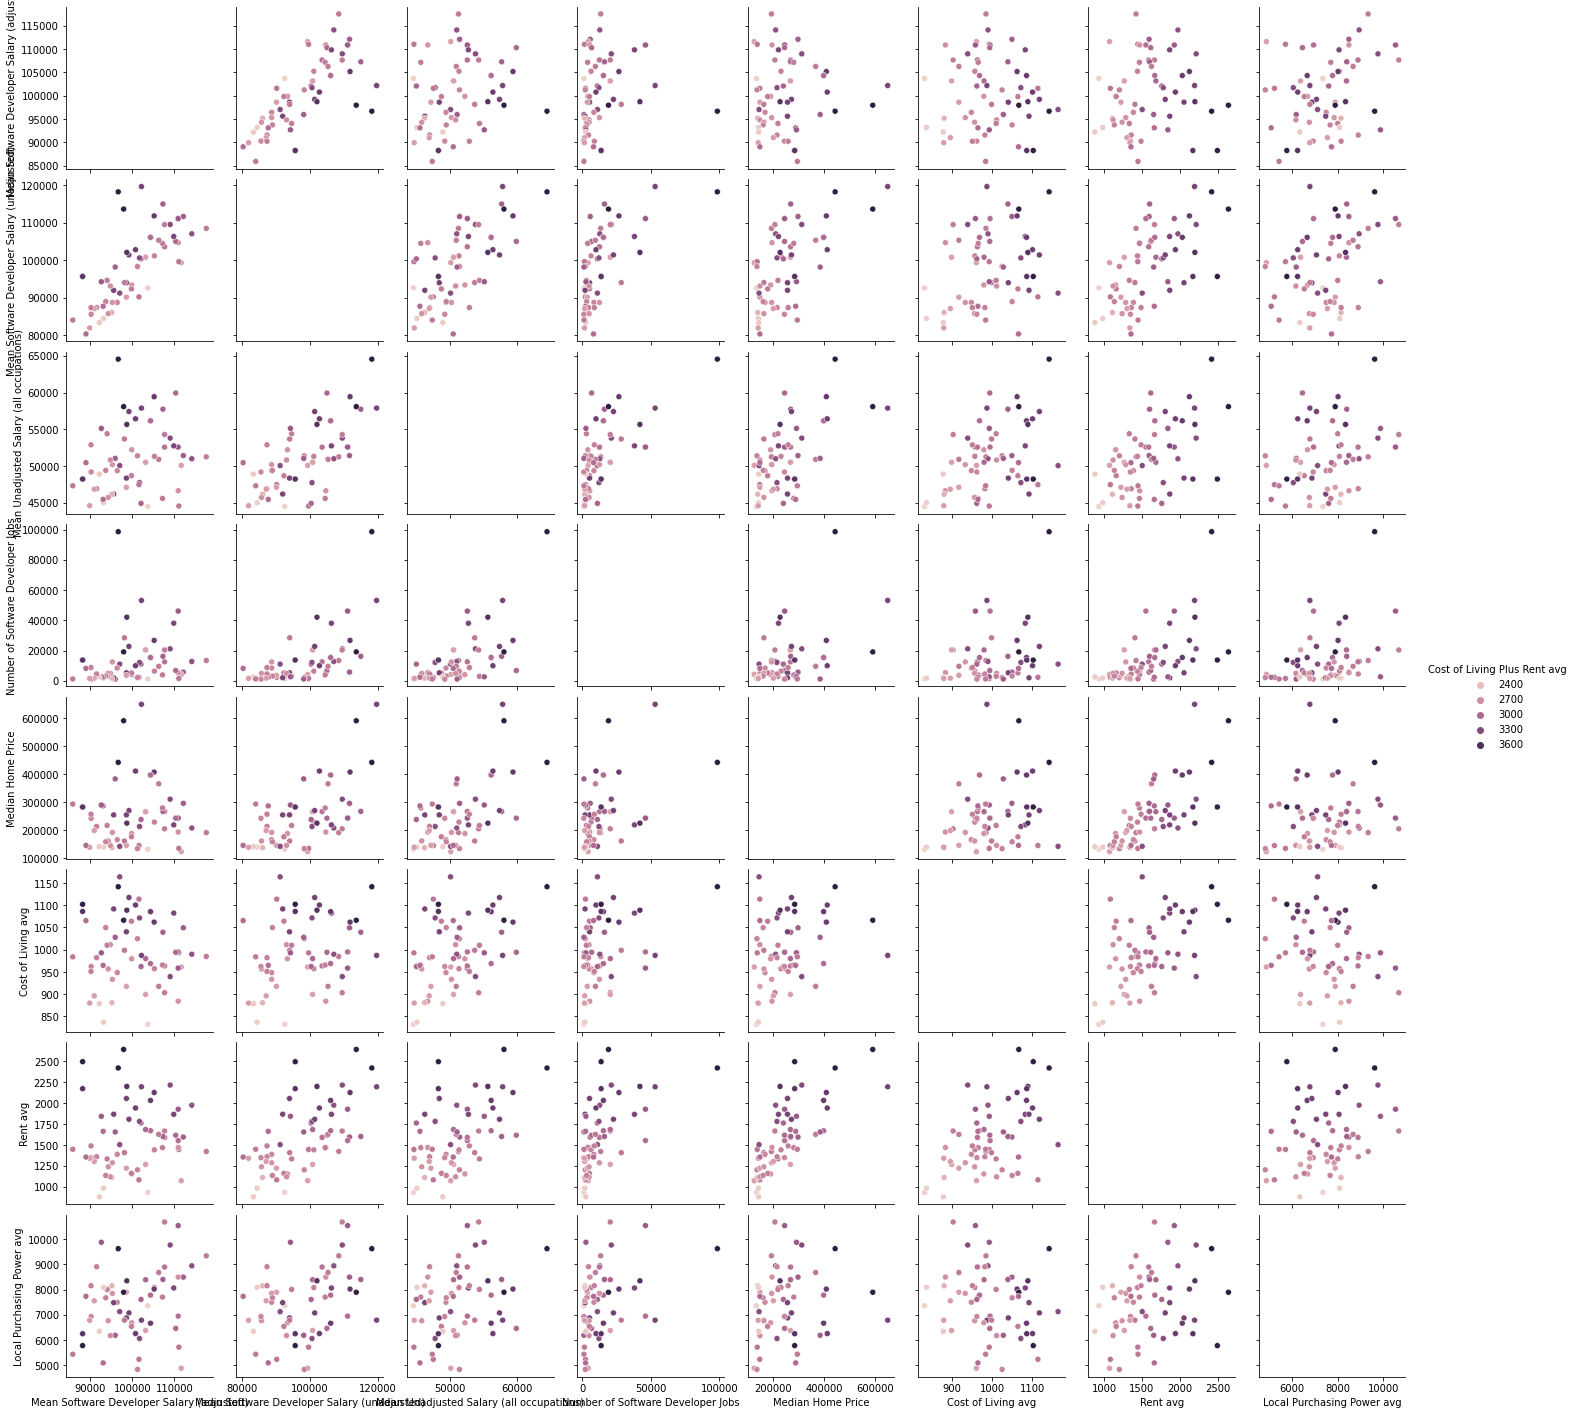

In [33]:
sns.pairplot(data_software, hue='Cost of Living Plus Rent avg')
plt.show()

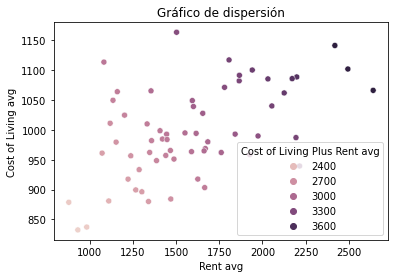

In [35]:
sns.scatterplot(x='Rent avg', y ='Cost of Living avg', data=data_software, hue='Cost of Living Plus Rent avg')
plt.title('Gráfico de dispersión')
plt.xlabel('Rent avg')
plt.ylabel('Cost of Living avg')
plt.show()

In [36]:
corr_software = data_software.corr(method='pearson')
corr_software

,Mean Software Developer Salary (adjusted),Mean Software Developer Salary (unadjusted),Mean Unadjusted Salary (all occupations),Number of Software Developer Jobs,Median Home Price,Cost of Living avg,Rent avg,Cost of Living Plus Rent avg,Local Purchasing Power avg
Mean Software Developer Salary (adjusted),1.000000,0.730788,0.243339,0.221750,0.065477,-0.051104,0.104835,0.053596,0.282476
Mean Software Developer Salary (unadjusted),0.730788,1.000000,0.661838,0.630806,0.618118,0.258795,0.613610,0.547329,0.366685
Mean Unadjusted Salary (all occupations),0.243339,0.661838,1.000000,0.638128,0.602579,0.424969,0.529945,0.557079,0.298637
Number of Software Developer Jobs,0.221750,0.630806,0.638128,1.000000,0.466375,0.318303,0.560590,0.534317,0.346747
Median Home Price,0.065477,0.618118,0.602579,0.466375,1.000000,0.293541,0.733844,0.647890,0.129524
Cost of Living avg,-0.051104,0.258795,0.424969,0.318303,0.293541,1.000000,0.521841,0.792319,-0.187465
Rent avg,0.104835,0.613610,0.529945,0.560590,0.733844,0.521841,1.000000,0.933912,0.252354
Cost of Living Plus Rent avg,0.053596,0.547329,0.557079,0.534317,0.647890,0.792319,0.933912,1.000000,0.101910
Local Purchasing Power avg,0.282476,0.366685,0.298637,0.346747,0.129524,-0.187465,0.252354,0.101910,1.000000


In [38]:
print(corr_software['Cost of Living Plus Rent avg'].sort_values(ascending=False)[:10], '\n')   #Top 10 valores 

Cost of Living Plus Rent avg                   1.000000
Rent avg                                       0.933912
Cost of Living avg                             0.792319
Median Home Price                              0.647890
Mean Unadjusted Salary (all occupations)       0.557079
Mean Software Developer Salary (unadjusted)    0.547329
Number of Software Developer Jobs              0.534317
Local Purchasing Power avg                     0.101910
Mean Software Developer Salary (adjusted)      0.053596
Name: Cost of Living Plus Rent avg, dtype: float64 



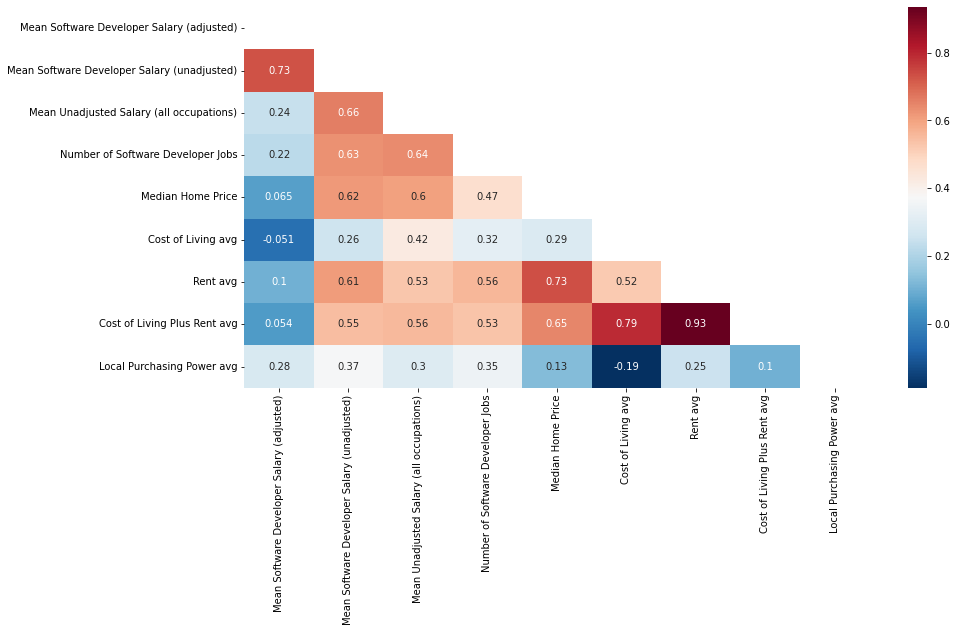

In [39]:
plt.figure(figsize=(14,7))
matriz_inf = np.triu(corr_software)
sns.heatmap(corr_software, cmap='RdBu_r', annot=True, mask=matriz_inf)
plt.show()

**Selección de variables:**

Se tiene 1 correlación alta: 'Rent avg' y 'Cost of Living Plus Rent avg' (0.93). Si el propósito es reducir la dimensionalidad, se pudieran suprimir 'Rent avg'.

In [40]:
data_software_acd = data_software.drop(columns=['Rent avg'])
data_software_acd

,Mean Software Developer Salary (adjusted),Mean Software Developer Salary (unadjusted),Mean Unadjusted Salary (all occupations),Number of Software Developer Jobs,Median Home Price,Cost of Living avg,Cost of Living Plus Rent avg,Local Purchasing Power avg
0,117552,108500,51260,13430,192000,984.8,2856.5,9335.4
2,114122,107046,51000,12800,208500,989.9,3221.1,8939.8
3,112118,111670,51430,5780,296500,1049.2,3094.5,8493.1
4,111616,99338,50100,4240,124100,961.2,2586.0,4887.7
5,111050,99612,44570,1560,136000,992.9,2888.0,5721.9
...,...,...,...,...,...,...,...,...
71,89921,81918,44610,1590,139900,880.1,2597.5,6784.5
72,89040,80314,50470,8220,146500,1065.5,2973.1,7732.9
73,88249,95662,48240,13740,283400,1102.1,3775.8,5782.4
74,88249,95662,48240,13740,283400,1086.0,3537.8,6252.0
